In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

from sklearn.metrics import balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Data Reading

In [2]:
# Reading the newly uploaded CSV file
file_path = 'D:/USD Univ. San Diego MS AI/AAI-500/Project/CDC Diabetes Dataset/diabetes_012_health_indicators_BRFSS2015.csv'
original_data = pd.read_csv(file_path)

# Show the glimps of dataset
pd.set_option('display.max_columns', None)
print(original_data.head())

# Checking the number of columns and rows
rows, columns = original_data.shape
print("\nNumber of Rows:",rows, "\n\nNumber of Columns:", columns,'\n')

# Identifying data types of each feature
data_types = original_data.info()



   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1            0        5       

### Data Preparation

#### Drop 'Diabetes_012' column as This is indicator not feature

In [3]:
# Drop the 'Diabetes_012' column
data = original_data.drop(columns=['Diabetes_012'])

# Display the first few rows of the updated dataset to confirm the column has been dropped
print(data.head())

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18     

#### Binary, Qualittaitve and Other Fetures 

In [4]:

# List of columns in the dataset
columns = data.columns.tolist()

# Identify binary features
binary_columns = [col for col in columns if data[col].nunique() == 2]

print("Binary Features:")
print(binary_columns)
print("\nNumber of Binary Features:", len(binary_columns))


# Identify non-binary features
non_binary_features = [col for col in data.columns if col not in binary_columns]

# Check the data types of each column
data_types = data.dtypes

# Identify qualitative features based on data type (object type in pandas usually indicates strings/characters)
qualitative_features = data_types[data_types == 'object'].index.tolist()

print("\nQualitative Features:")
print(qualitative_features)
print("\nNumber of Qualitative Features:", len(qualitative_features))


# Identify other non-binary features which are not character/quality features
non_binary_columns = [col for col in non_binary_features if col not in qualitative_features]

print("\nOther Non-Binary Features:")
print(non_binary_columns )
print("\nNumber of Other Features:", len(non_binary_columns ))

Binary Features:
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

Number of Binary Features: 14

Qualitative Features:
[]

Number of Qualitative Features: 0

Other Non-Binary Features:
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Number of Other Features: 7


### Data Cleaning

##### Find missing values

In [5]:
# Task 1: Find missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0] # columns with no missing values are removed

# Print results
if len(missing_values)>0:
    print("Missing Values:", missing_values,"\n")
else:
    print('No Missing Value\n')

No Missing Value



##### Check duplicate rows

In [6]:
# Task 2: Check duplicate rows
duplicate_rows = original_data[original_data.duplicated()]  # original_data is used to consider disease stage during duplicate checking 

# Print duplicate rows details
if len(duplicate_rows>0):
    print("Number of Duplicate Rows:",len(duplicate_rows))
    print('\n')
    
    # Remove duplicate rows
    original_data_no_duplicate=original_data.drop_duplicates()
    data_no_duplicate = original_data_no_duplicate.drop(columns=['Diabetes_012'])
    data=data_no_duplicate
    
    # Print the number of rows before and after removing duplicates
    print(f"Number of rows before removing duplicates: {len(original_data)}")
    print(f"Number of rows after removing duplicates: {len(data)}")

else:
    print("No Duplicate data\n")

print("\n")    

Number of Duplicate Rows: 23899


Number of rows before removing duplicates: 253680
Number of rows after removing duplicates: 229781




#### Saving Created Clean files

In [7]:
# Define the file path where you want to save the CSV file
file_path_1 = 'D:/USD Univ. San Diego MS AI/AAI-500/Project/CDC Diabetes Dataset/Data_without_duplicate.csv'
file_path_2 = 'D:/USD Univ. San Diego MS AI/AAI-500/Project/CDC Diabetes Dataset/Data_without_duplicate_n_Disease_stage.csv'

# Save the DataFrame to CSV
original_data_no_duplicate.to_csv(file_path_1, index=False)  # Set index=False to exclude row numbers (index) from the saved file
data_no_duplicate.to_csv(file_path_2, index=False)  # Set index=False to exclude row numbers (index) from the saved file

### EDA 

#### Check correlation through Heatmap

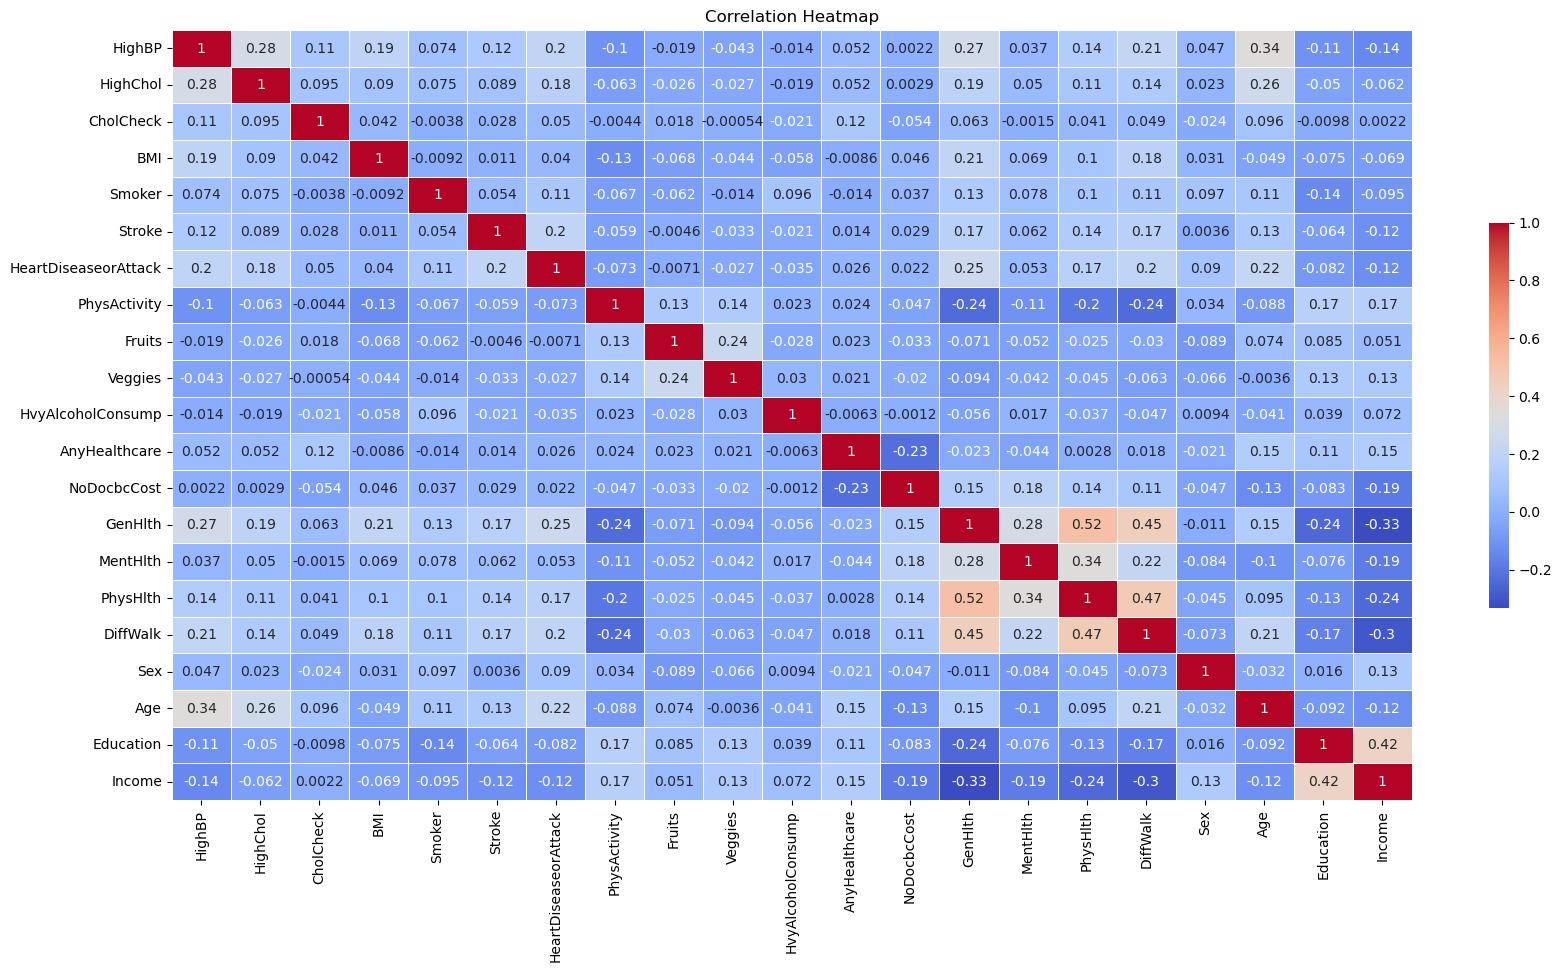

In [8]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Correlation Heatmap')
plt.show()

##### Check Outliers in Non-binary Features through Quantile

In [9]:
# Task 3: Check outliers in non-binary columns through Quantile 
outliers_quantile = {}

for col in non_binary_columns:
    # Calculate IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Find outliers
    outlier_indices_quantile = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))].index
    if len(outlier_indices_quantile) > 0:
        outliers_quantile[col] = outlier_indices_quantile

# Display the results
features_with_outliers = {col: len(indices) for col, indices in outliers_quantile.items()}
print("\nFeatures with Outliers (as per quantile):", features_with_outliers)



Features with Outliers (as per quantile): {'BMI': 5638, 'GenHlth': 12078, 'MentHlth': 36163, 'PhysHlth': 34347}


##### Check Outliers in Non-binary Features through Z-score

In [10]:
# Calculate Z-scores and identify outliers
outliers_z_score = {}

for col in non_binary_columns:
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    outlier_indices = data[np.abs(z_scores) > 3].index
    if len(outlier_indices) > 0:
        outliers_z_score[col] = outlier_indices

# Display the results
outliers_z_score_summary = {col: len(indices) for col, indices in outliers_z_score.items()}
print("\nFeatures with Outliers (as per z_score):",outliers_z_score_summary,'\n')



Features with Outliers (as per z_score): {'BMI': 2547, 'MentHlth': 12644, 'Education': 4214} 



##### Combined Features Suspected of Having Outliers

In [11]:
# Combine keys from both dictionaries and remove duplicates
outliers_all = list(set(outliers_quantile.keys()).union(set(outliers_z_score.keys())))

# Print the final list of unique keys
print("All possible features with outliers:", outliers_all,"\n")



All possible features with outliers: ['Education', 'MentHlth', 'GenHlth', 'PhysHlth', 'BMI'] 



#### Plotting Features with Outliers

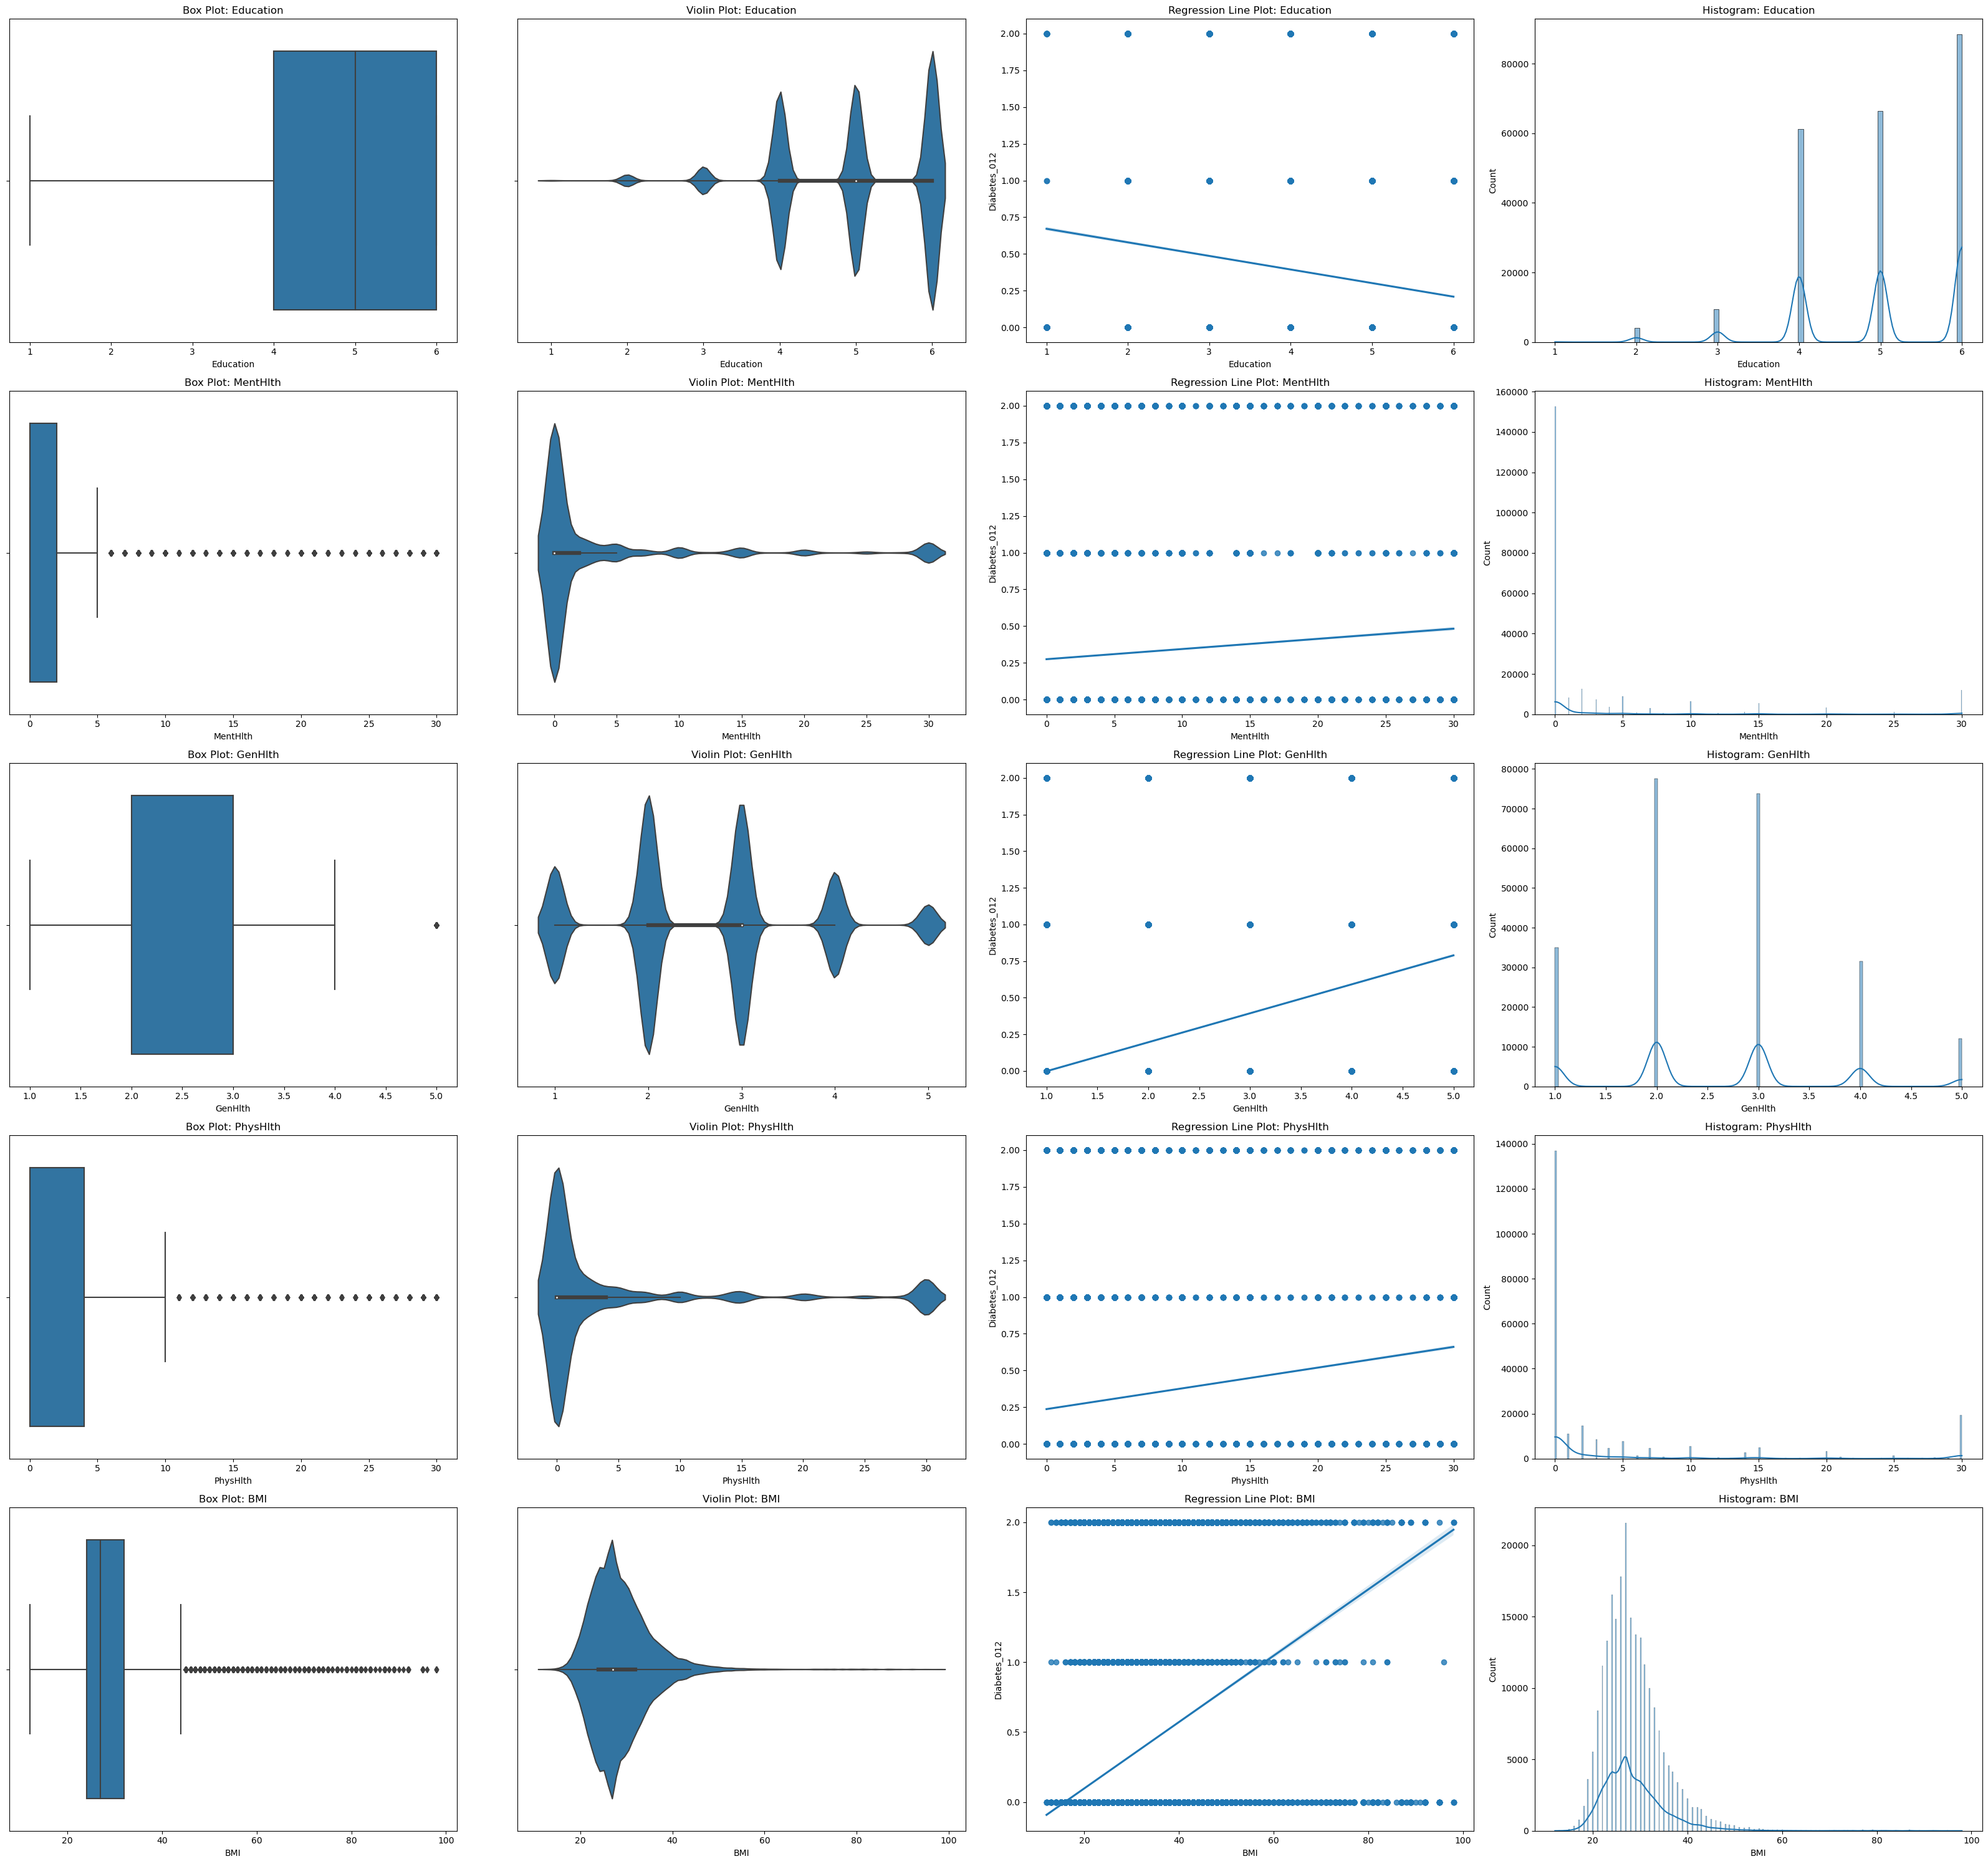

In [12]:
# Plotting data for visual inspection of outliers
num_rows = len(outliers_all)

fig, axes = plt.subplots(num_rows, 4, figsize=(32, num_rows * 6))
axes = axes.reshape(num_rows, 4)  # Reshape to easily access [row, column]

for i, feature in enumerate(outliers_all):
    # Box Plot
    sns.boxplot(data=data, x=feature, ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot: {feature}')
    
    # Violin Plot
    sns.violinplot(data=data, x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'Violin Plot: {feature}')
    
    # Regression Line Plot
    sns.regplot(data=original_data, x=feature, y='Diabetes_012', ax=axes[i, 2])  # Assuming 'Diabetes_012' is the target variable
    axes[i, 2].set_title(f'Regression Line Plot: {feature}')
    
    # Histogram
    sns.histplot(data[feature], kde=True, ax=axes[i, 3])
    axes[i, 3].set_title(f'Histogram: {feature}')


# Adjust layout
plt.tight_layout()
plt.show()


#### Visual Inspection and Decision

From the above plots, MntlHlth and PhysHlth are showing sudden growth in values breaking the pattern at around 30. Hence, for these two features 25 is taken as upper boundary for considerable data. <br> For GenHlth beyond some unexpected data is at 5.0. For this upper boundary is taken as 4.5. <br> in BMI, from Violin plot we can conclude that beyond 60, the datapoints may be outliers.  


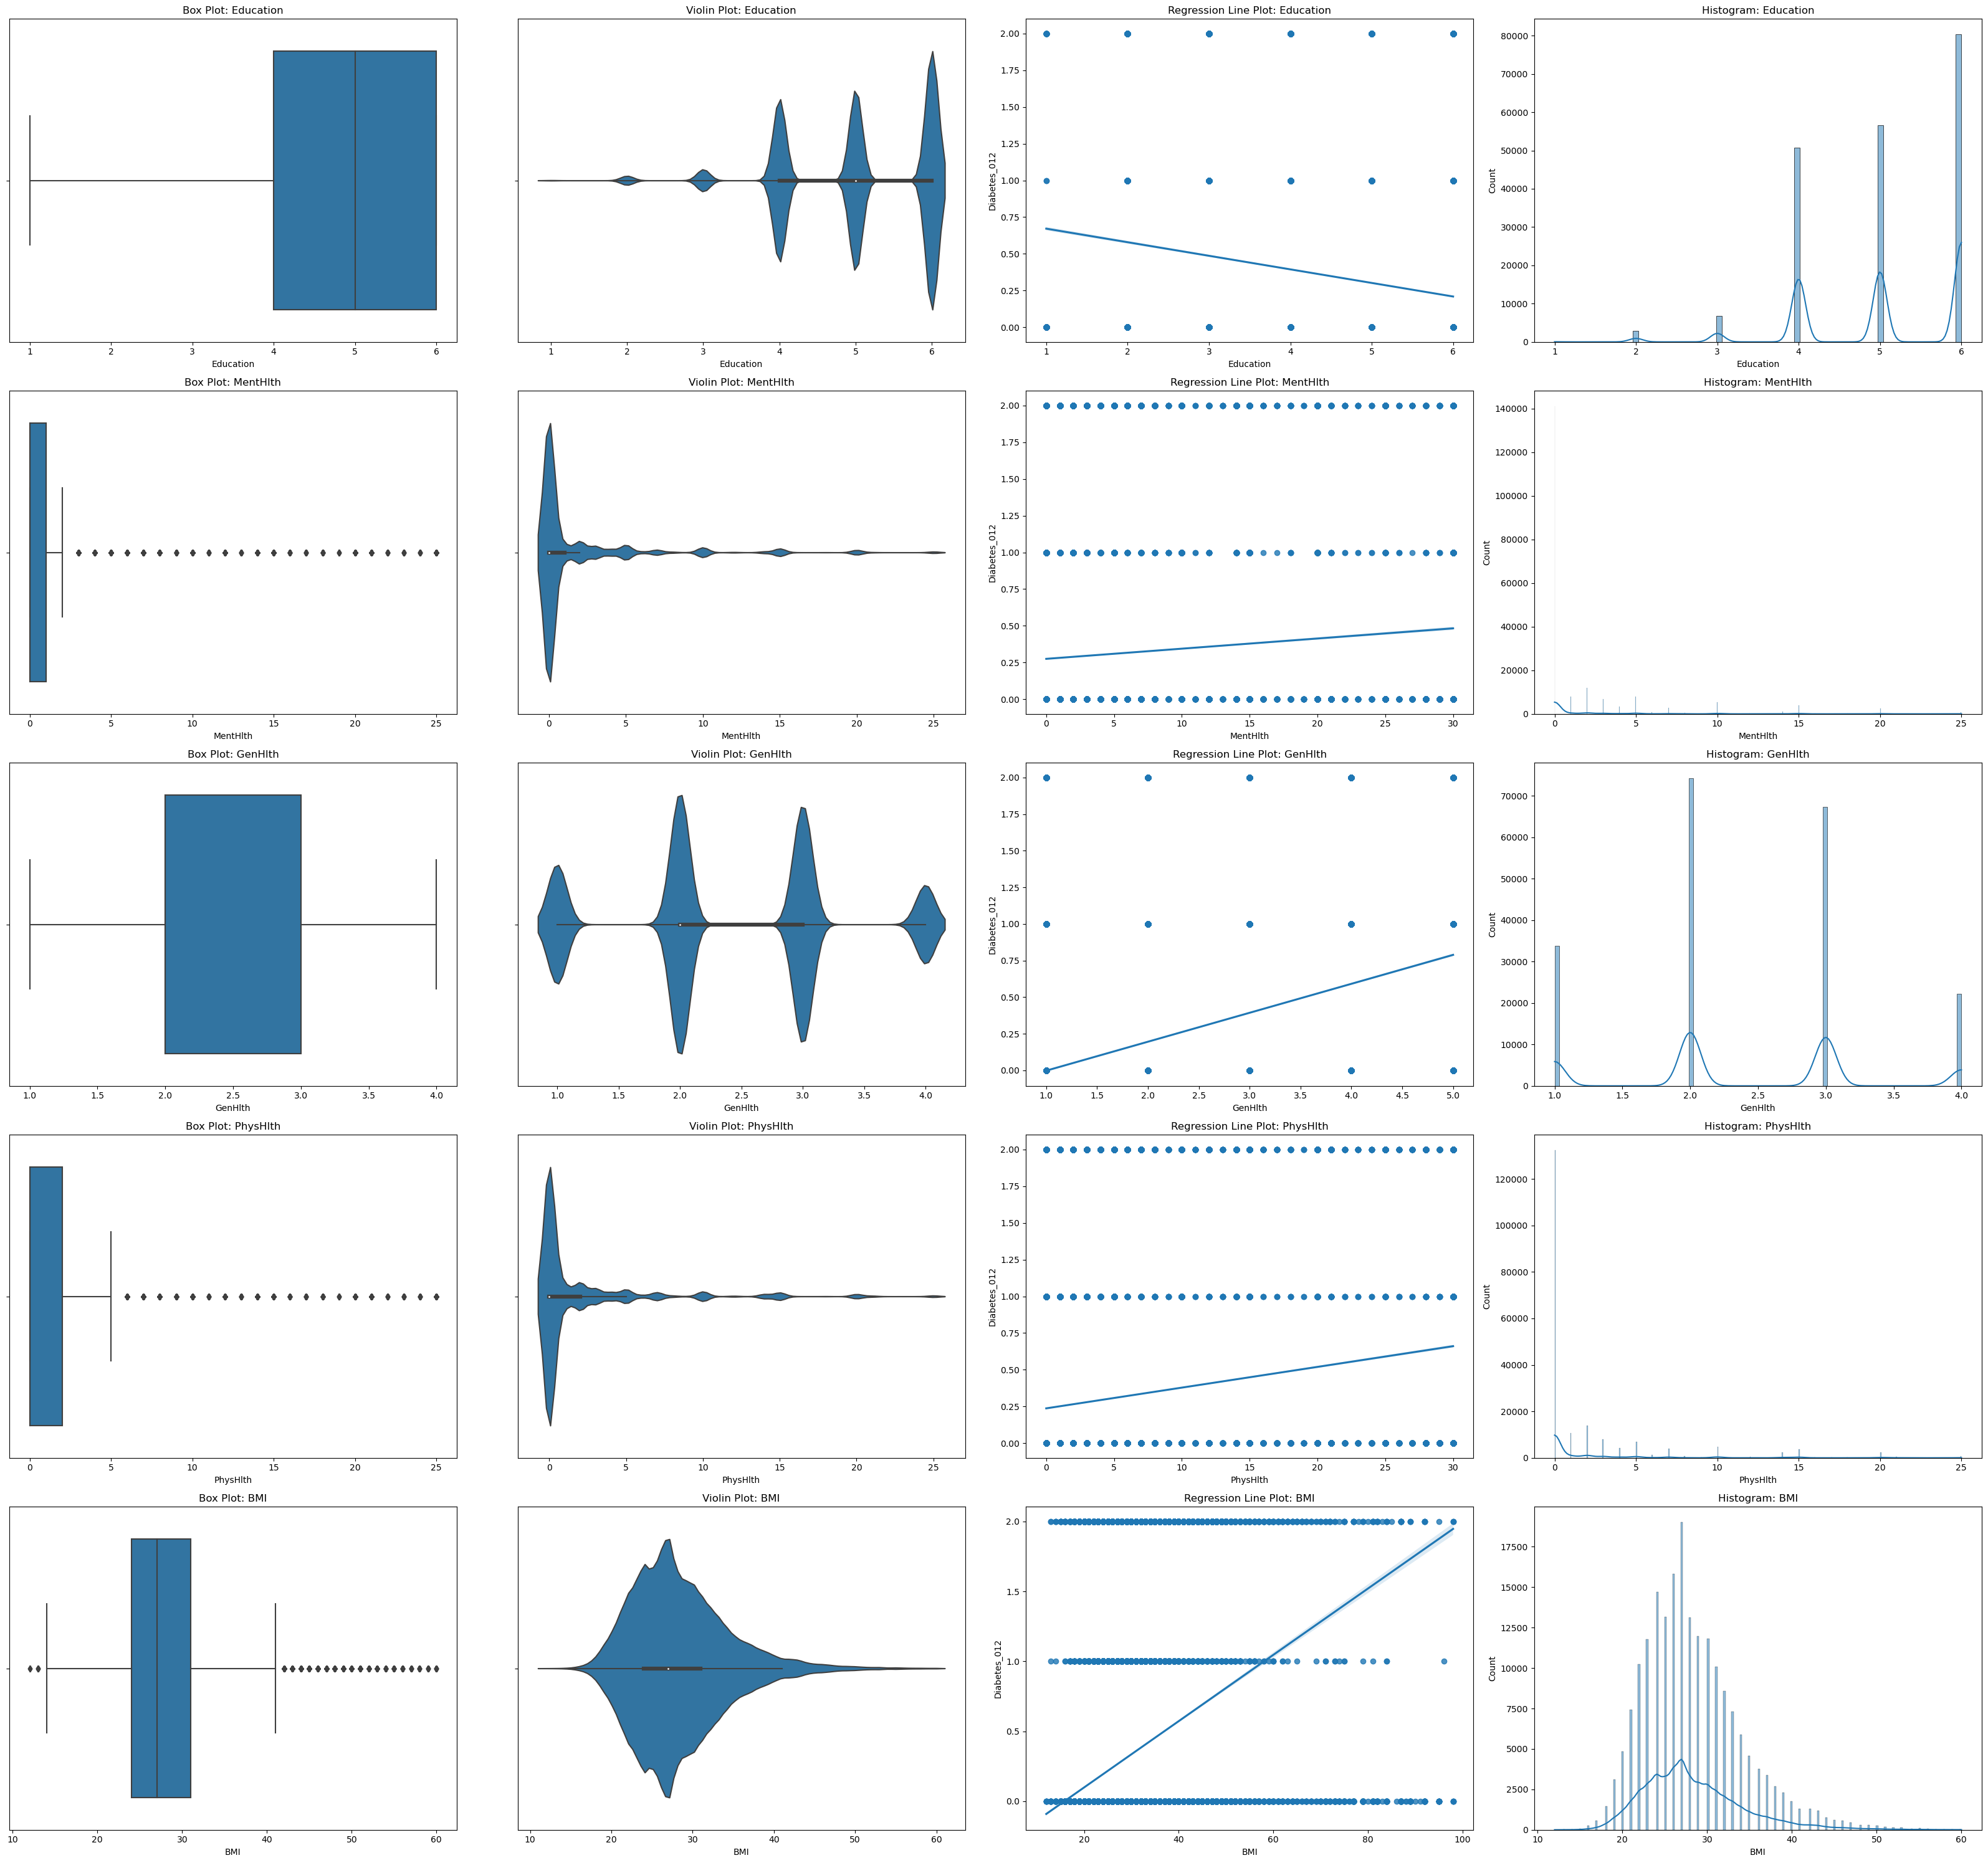

In [13]:

# Drop outliers from 'PhysHlth' and 'MentHlth' based on the lower boundary
upper_boundary = 25
data_filtered_1 = original_data_no_duplicate[
    (original_data_no_duplicate['PhysHlth'] <= upper_boundary) &
    (original_data_no_duplicate['MentHlth'] <= upper_boundary)
]

# Drop outliers from 'GenHlth' based on the lower boundary
upper_boundary = 4.5
data_filtered_2 = data_filtered_1[
    (data_filtered_1['GenHlth'] <= upper_boundary)]

# Drop outliers from 'BMI' based on the lower boundary
upper_boundary = 60
data_filtered = data_filtered_2[
    (data_filtered_2['BMI'] <= upper_boundary)]


# Save the filtered data to a new CSV file (optional)
data_filtered.to_csv('filtered_data.csv', index=False)

# store the data created into 'data' file for further use
data=data_filtered

# Plotting data for visual inspection of outliers
num_rows = len(outliers_all)

fig, axes = plt.subplots(num_rows, 4, figsize=(32, num_rows * 6))
axes = axes.reshape(num_rows, 4)  # Reshape to easily access [row, column]

for i, feature in enumerate(outliers_all):
    # Box Plot
    sns.boxplot(data=data, x=feature, ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot: {feature}')
    
    # Violin Plot
    sns.violinplot(data=data, x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'Violin Plot: {feature}')
    
    # Regression Line Plot
    sns.regplot(data=original_data, x=feature, y='Diabetes_012', ax=axes[i, 2])  # Assuming 'Diabetes_012' is the target variable
    axes[i, 2].set_title(f'Regression Line Plot: {feature}')
    
    # Histogram
    sns.histplot(data[feature], kde=True, ax=axes[i, 3])
    axes[i, 3].set_title(f'Histogram: {feature}')


# Adjust layout
plt.tight_layout()
plt.show()


#### Imbalance Indentification

##### Check Balance in Disease Stages

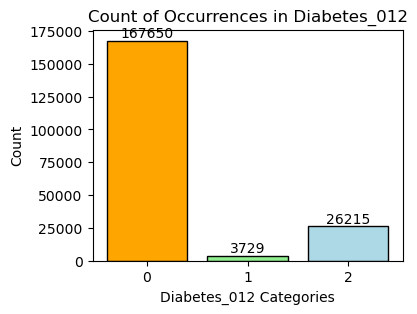

Counts of each unique value in 'Diabetes_012':
Diabetes_012
0    167650
1      3729
2     26215
Name: count, dtype: int64


In [14]:
# Assuming 'original_data_no_duplicate' is loaded and defined correctly

# Count occurrences of each unique value in 'Diabetes_012'
diabetes_counts = data['Diabetes_012'].value_counts().sort_index()

# Define colors for each category
colors = ['orange', 'lightgreen', 'lightblue']

# Plotting the counts with annotations
plt.figure(figsize=(4,3))
bars = plt.bar(diabetes_counts.index.astype(str), diabetes_counts.values, color=colors, edgecolor='black')

# Adding annotations (counts) on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Count of Occurrences in Diabetes_012')
plt.xlabel('Diabetes_012 Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the counts
print("Counts of each unique value in 'Diabetes_012':")
print(diabetes_counts)


##### Check Balance Within Features

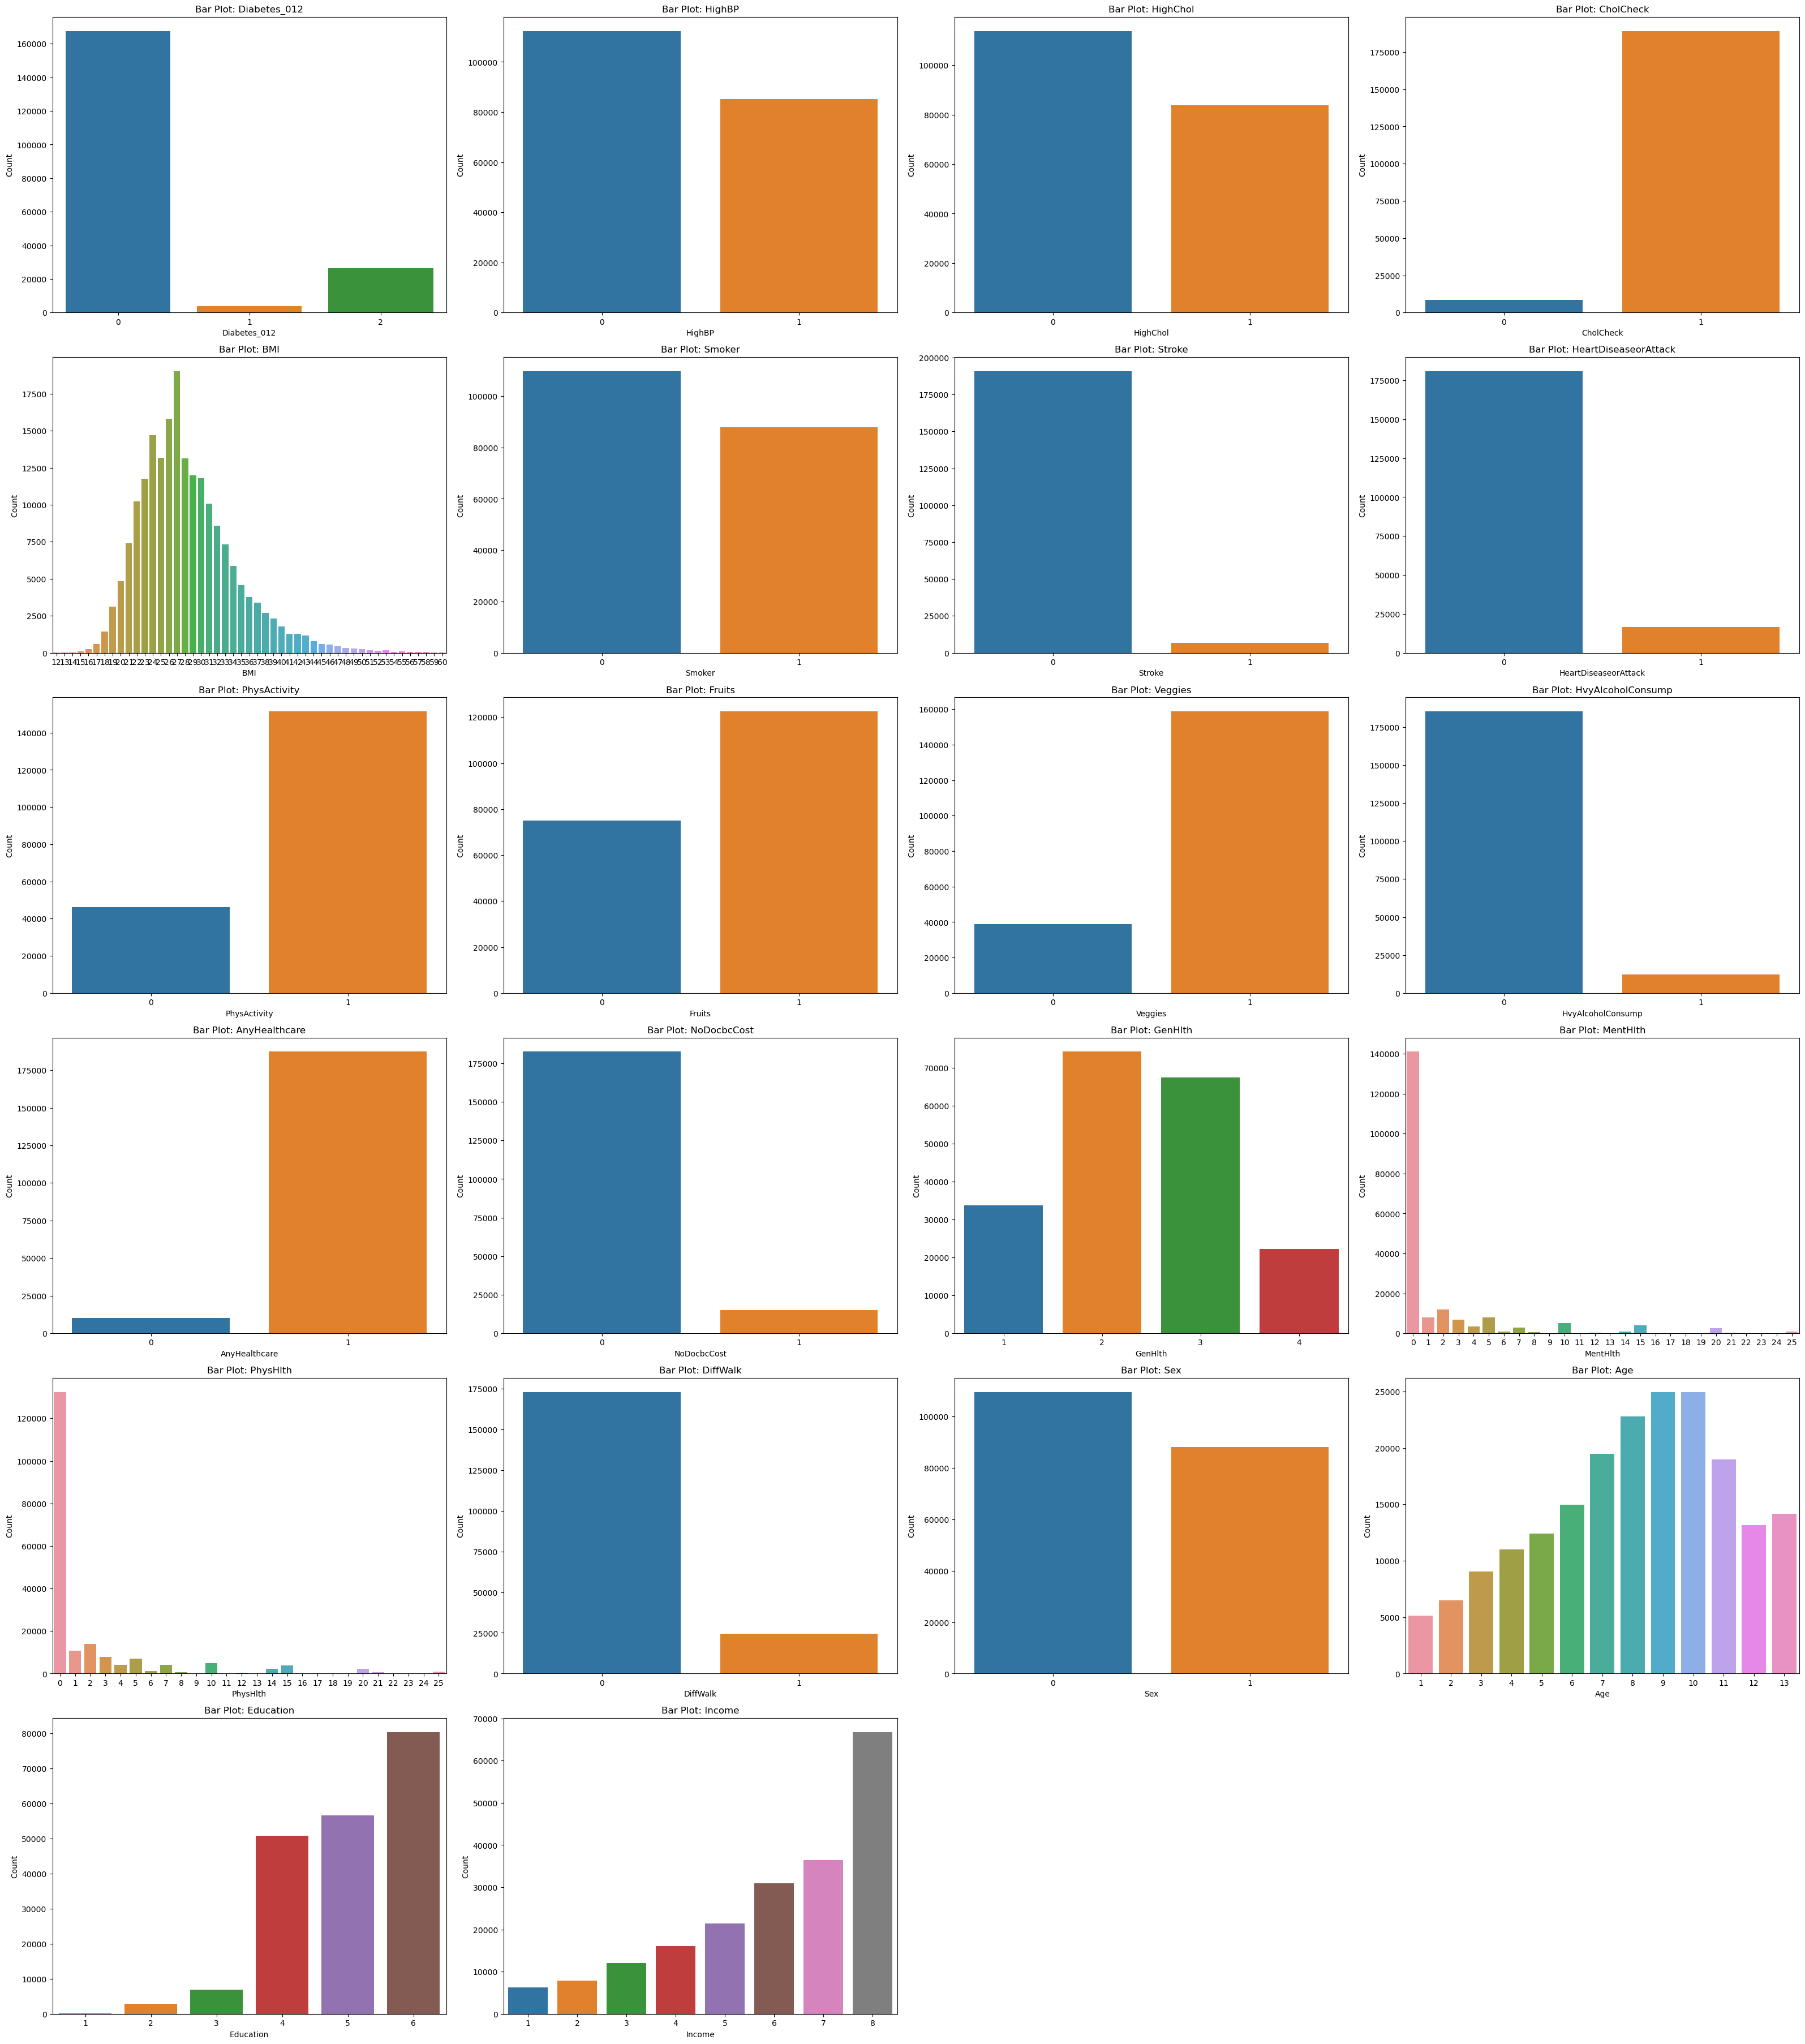

In [15]:
# Define the features to plot (assuming all columns are features)
features_to_plot = data.columns

# Plotting Value Counts and Bar Plots for all features
num_row = len(features_to_plot)
num_col=4
fig, axes = plt.subplots(num_row, num_col, figsize=(32, num_row * 6))
axes = axes.reshape(num_row, num_col)  # Reshape to easily access [row, column]


for i, feature in enumerate(features_to_plot):
    ax = axes[i // num_col, i % num_col]
    sns.countplot(data=data, x=feature, ax=ax)
    ax.set_title(f'Bar Plot: {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Remove any empty subplots
for i in range(len(features_to_plot), num_row * num_col):
    fig.delaxes(axes[i // num_col, i % num_col])
    
    
# Adjust layout
plt.tight_layout()
plt.show()


##### Feature Values Grouped by Disease Stages

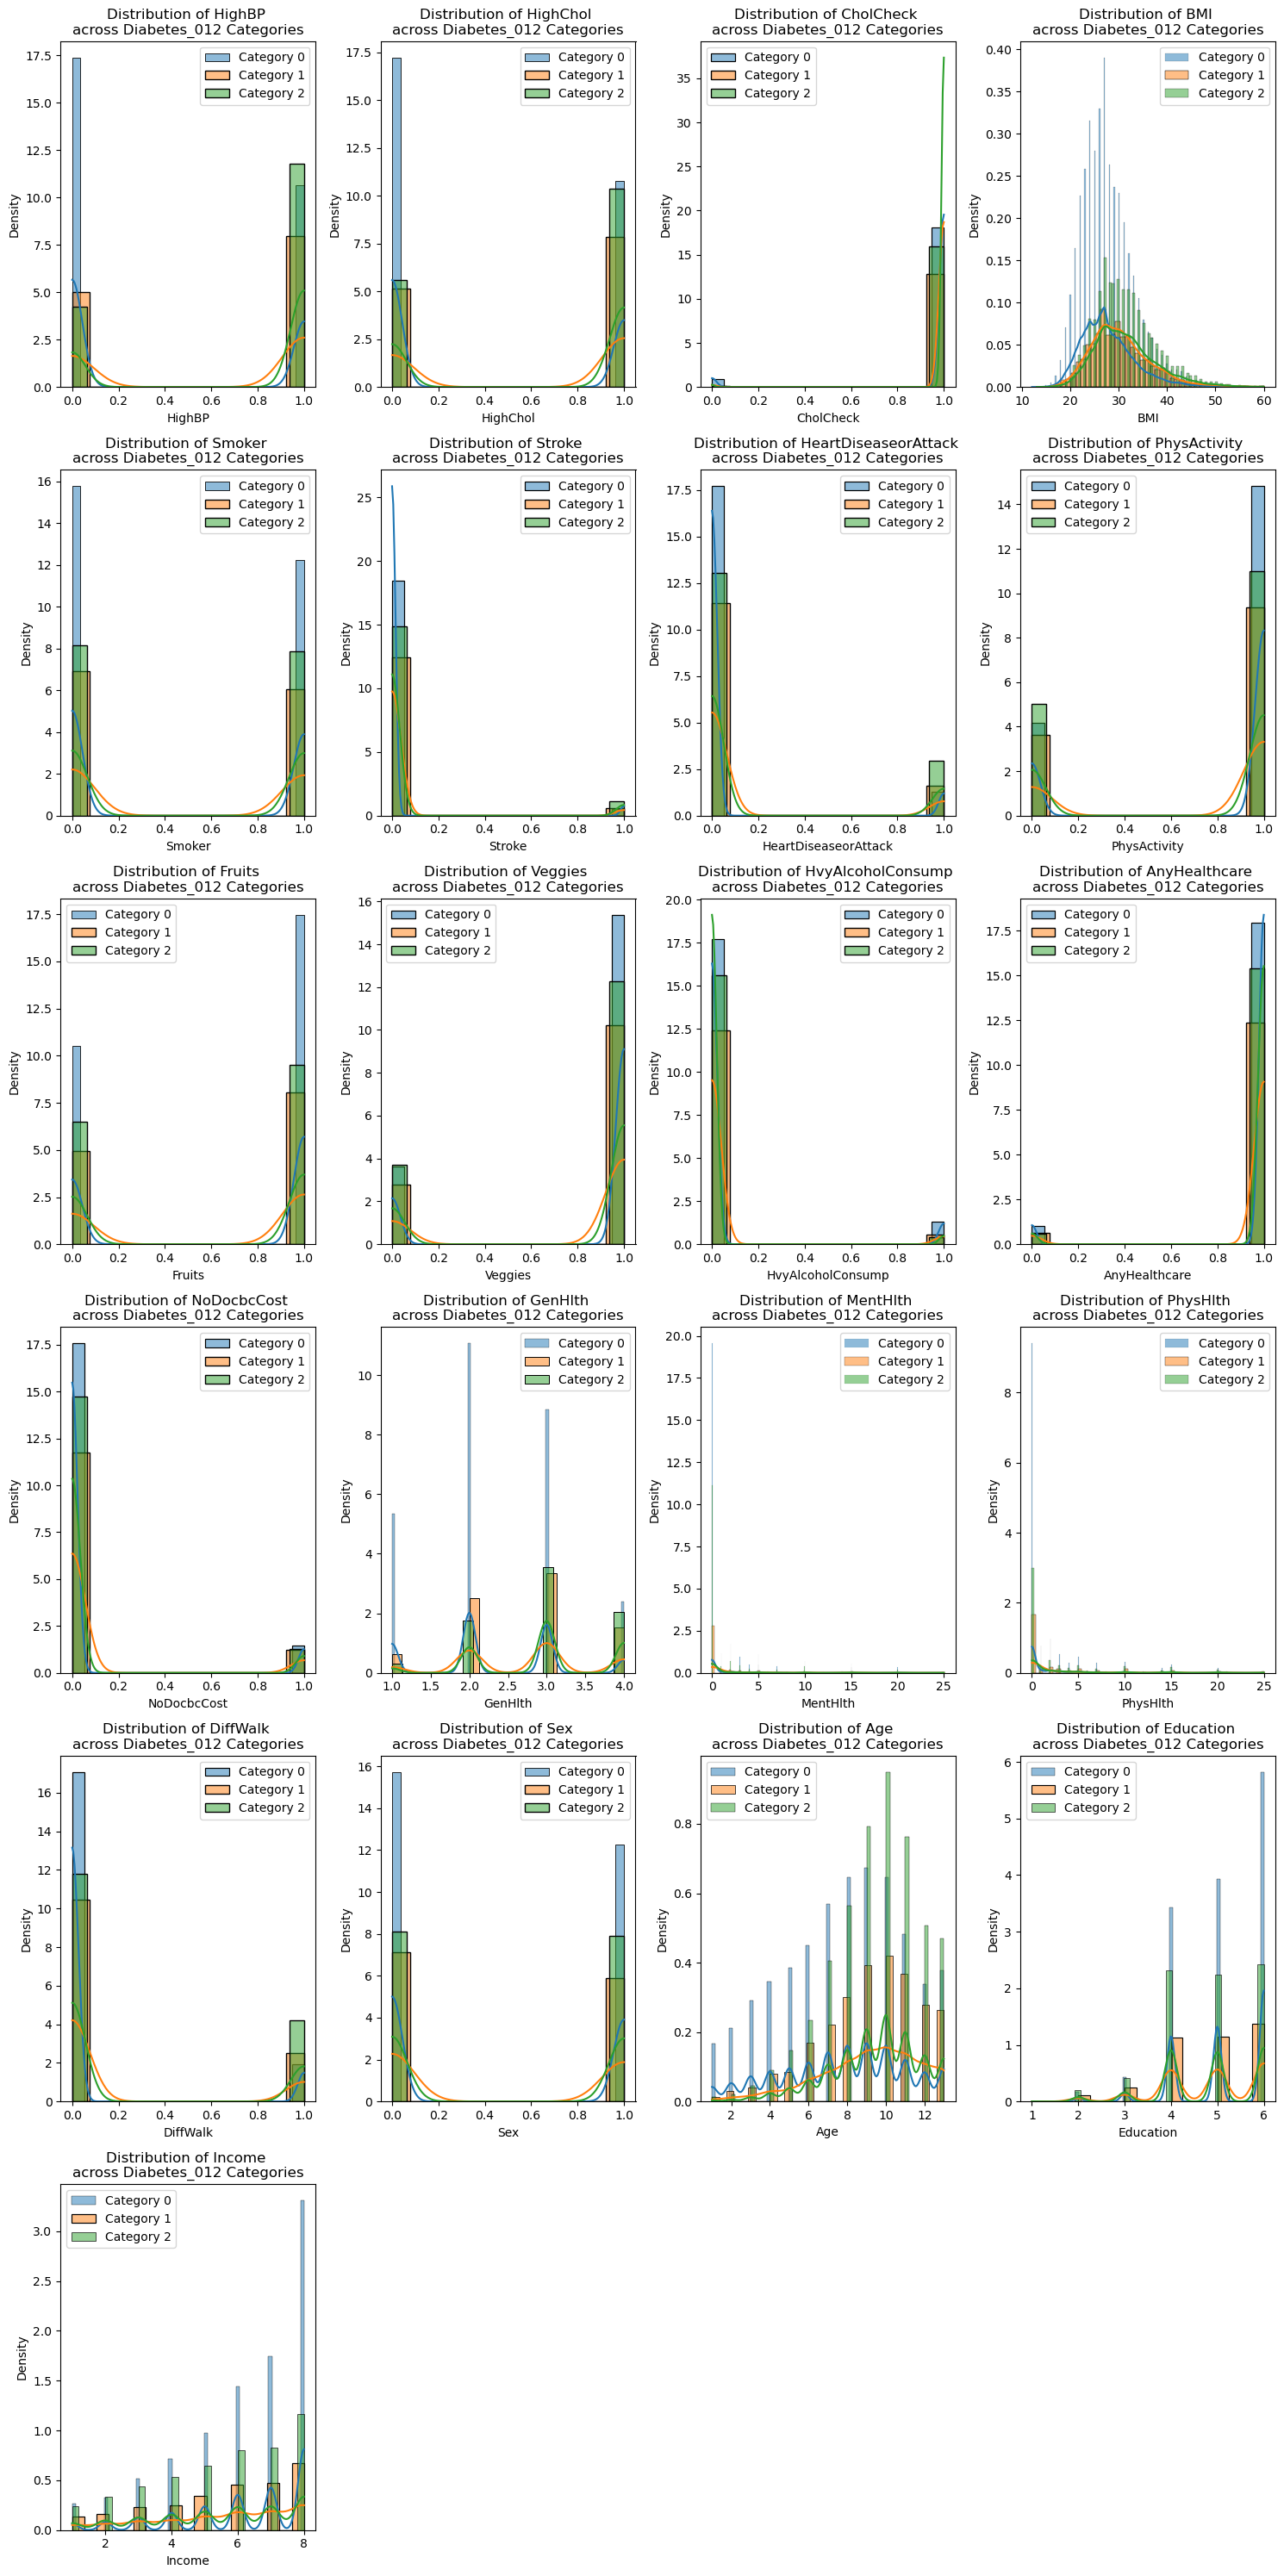

In [16]:
# Group data by 'Diabetes_012' categories
grouped_data = data.groupby('Diabetes_012')

# Plot Distribution for Each Feature:

# Define features to check (exclude 'Diabetes_012')
features_to_check = [col for col in data.columns]

# Calculate number of rows and columns based on features
num_features = len(features_to_check)-1
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols  # Round up division

# Plot distribution for each feature across 'Diabetes_012' categories in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array to iterate through
axes = axes.flatten()

features_to_check_1=features_to_check[1:]
for i, feature in enumerate(features_to_check_1):
    ax = axes[i]
    for category, group in grouped_data:
        sns.histplot(group[feature], kde=True, label=f'Category {category}', stat='density', common_norm=False, ax=ax)
    ax.set_title(f'Distribution of {feature} \nacross Diabetes_012 Categories')
    ax.set_xlabel(feature)
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#### Correlation Analysis through Heatmap

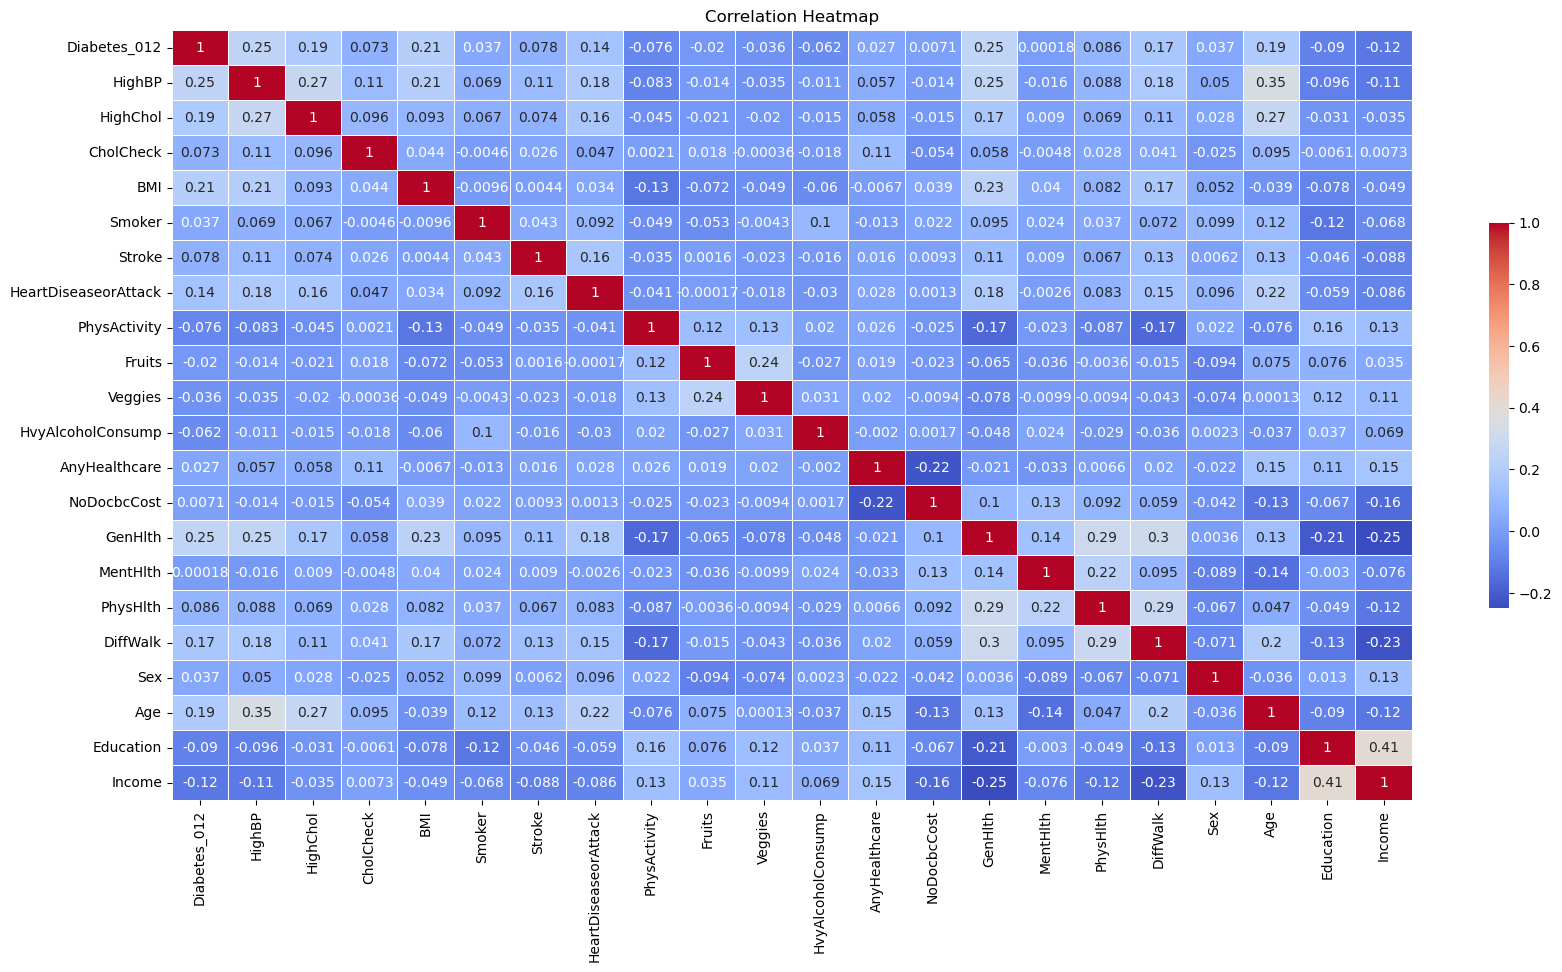

In [17]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Correlation Heatmap')
plt.show()

## Dimension Reduction 

### Decision 
##### After observing the plots it has been decided to remove the features which are having low variance

In [18]:
# Apply VarianceThreshold to remove low variance features
selector = VarianceThreshold(threshold=0.2)  # Adjust threshold as needed
data_selected = selector.fit_transform(data)

# Get selected feature names 
selected_features = data.columns[selector.get_support()]

print("\nData after VarianceThreshold:")
print(tuple(i for i in (selected_features)))



Data after VarianceThreshold:
('Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income')


##### Create Data Files for Model Designing

In [19]:
# Create reduced_data DataFrame with selected features
full_reduced_data = pd.DataFrame(data_selected, columns=selected_features)

# Add 'Diabetes_012' column as the first column to full_reduced_data
reduced_data = full_reduced_data.drop(columns=['Diabetes_012'])

# Save the datasets to CSV files 
reduced_data.to_csv('reduced_data.csv', index=False)
full_reduced_data.to_csv('full_reduced_data.csv', index=False)

# Print the first few rows of the datasets to verify
print("Reduced Data:\n")
print(tuple(i for i in (full_reduced_data)),'\n')
full_reduced_data.head()

Reduced Data:

('Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income') 



,Diabetes_012,HighBP,HighChol,BMI,Smoker,Fruits,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,0,0,25,1,0,3,0,0,0,7,6,1
1,0,1,0,27,0,1,2,0,0,0,11,3,6
2,0,1,1,24,0,1,2,3,0,0,11,5,4
3,0,1,1,25,1,1,2,0,2,1,10,6,8
4,0,1,0,30,1,0,3,0,14,0,9,6,7


#### Correlation Analysis REPEATED through Heatmap

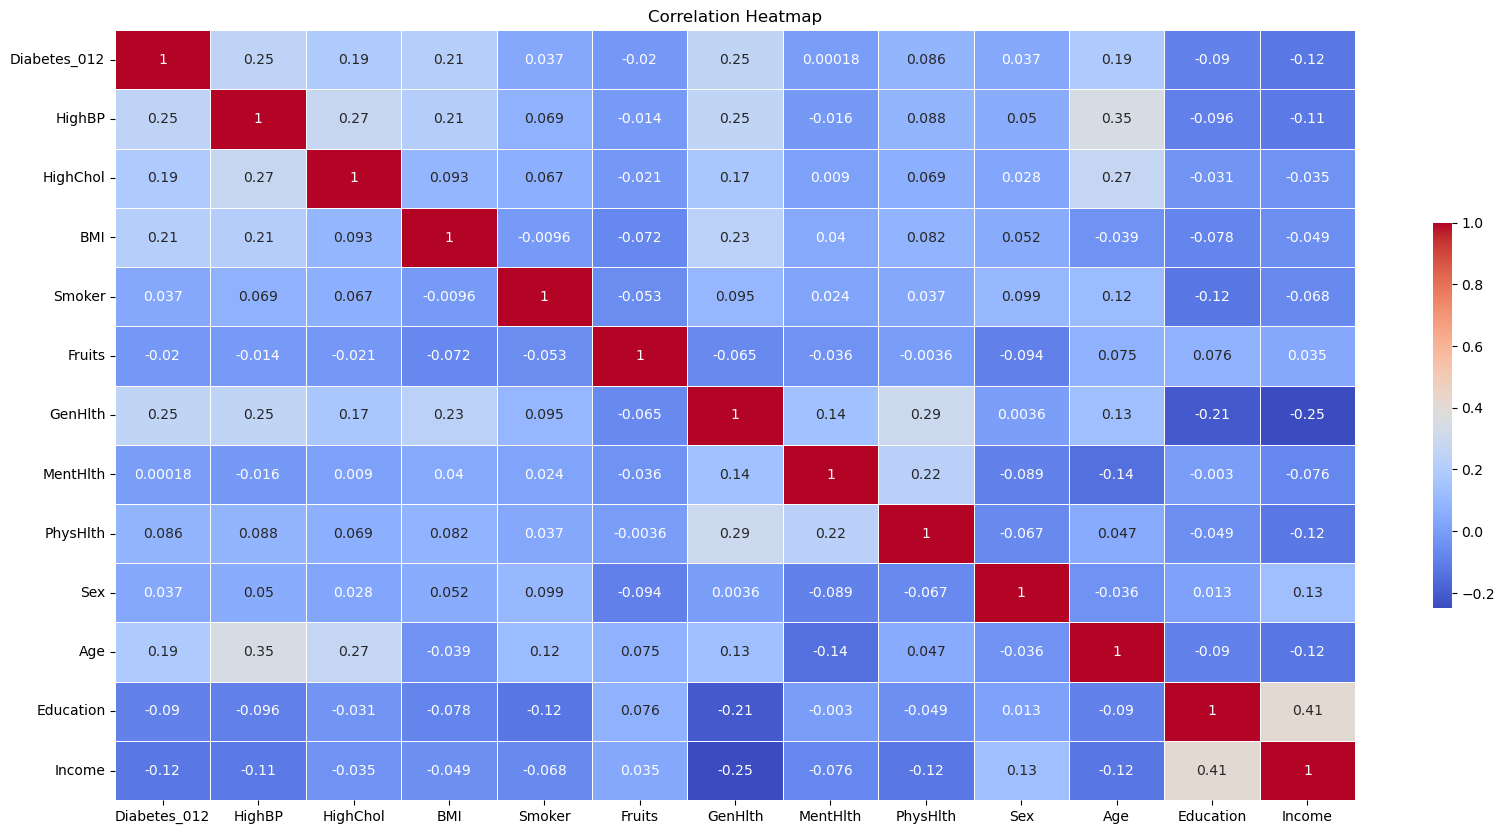

In [20]:
# Compute the correlation matrix
corr_matrix = full_reduced_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Correlation Heatmap')
plt.show()

<br>-----------------------------------------------------------------------------------------------------------<br>
<div style="font-size: 15px; font-family: Verdana, Geneva, sans-serif; color: darkgreen;">  Hence, we are having datafile 
    <b> full_reduced_data</b> 
        as final outcome of the data pre-processing process<br>-----------------------------------------------------------------------------------<br>
</div>
<div style="font-size: 15px; font-family: Verdana, Geneva, sans-serif; color: darkgreen;">    The file is store at root directory and the path is 
</div>
 <div style="font-size: 18px; font-family: 'Courier New', Courier, monospace; color: darkgreen;">     <b>C:\Users\Soumiz\Anaconda\USD\full_reduced_data.csv</b>
    <br>-----------------------------------------------------------------------------------<br><br> 
</div>
<br>

### <Font color='Green'> ------------------------------------------------------------ END of Data Preparation -----------------------------------------------------------